# TODOs
- [ ] Filter out preseason/playoff games?
- [x] Get betting odds 
  - [x] Calculate winnings with naive betting strategy
  - [ ] Model out over/under
- [ ] Examine different model types

In [17]:
import pandas as pd
import numpy as np
import gc
import matplotlib.pyplot as plt


In [18]:
games = pd.read_csv('data/games.csv')
teams = pd.read_csv('data/raw/nba_teams.csv')
nba_games = games.copy()
nba_games["AWAY_TEAM_ID"] = nba_games["VISITOR_TEAM_ID"]

home_game_data = []
away_game_data = []
for team in teams["TEAM_ID"]:
  print("******************")
  print("******************")
  print("******************")
  print(f"Processing team {team}...")
  team_games = nba_games[(nba_games["HOME_TEAM_ID"] == team) | (nba_games["AWAY_TEAM_ID"] == team)]
  # print(team_games)
  # print(pd.to_datetime(team_games["GAME_DATE_EST"]))
  team_games["GAME_DATE_EST"] = pd.to_datetime(team_games["GAME_DATE_EST"])
  # print(team_games.info())

  for _, game in team_games.iterrows():
    # print(game)
    previous_games = team_games[(team_games["GAME_DATE_EST"] < game["GAME_DATE_EST"]) & (team_games["SEASON"] == game["SEASON"])]
    previous_home_games = previous_games[previous_games["HOME_TEAM_ID"] == team]
    previous_away_games = previous_games[previous_games["AWAY_TEAM_ID"] == team]
    previous_won_home_games = previous_home_games[previous_home_games["HOME_TEAM_WINS"] == 1]
    previous_won_away_games = previous_away_games[previous_away_games["HOME_TEAM_WINS"] == 0]


    if game["HOME_TEAM_ID"] == team:
      home_game_data.append({
        "GAME_ID": game["GAME_ID"],
        "HOME_WIN_PCT": (len(previous_won_home_games) + len(previous_won_away_games)) / len(previous_games) if len(previous_games) > 0 else 0,
        "HOME_WIN_PCT_AT_HOME": len(previous_won_home_games) / len(previous_home_games) if len(previous_home_games) > 0 else 0,
      })
    else:
      away_game_data.append({
        "GAME_ID": game["GAME_ID"],
        "AWAY_WIN_PCT": (len(previous_won_home_games) + len(previous_won_away_games)) / len(previous_games) if len(previous_games) > 0 else 0,
        "AWAY_WIN_PCT_AWAY": len(previous_won_away_games) / len(previous_away_games) if len(previous_away_games) > 0 else 0
      })
  print(f"Home game data: {len(home_game_data)}")
  print(f"Away game data: {len(away_game_data)}")

home_game_data_df = pd.DataFrame(home_game_data)
away_game_data_df = pd.DataFrame(away_game_data)
game_data_df = home_game_data_df.merge(away_game_data_df, how="inner", on="GAME_ID")

new_nba_games = nba_games.merge(game_data_df, how="inner", on="GAME_ID")
print("DONE MERGING")
print(new_nba_games.info())

******************
******************
******************
Processing team 1610612766...


/var/folders/mn/9mbt16qj52sdhm9wxkl4yy440000gr/T/ipykernel_7607/3375804390.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_games["GAME_DATE_EST"] = pd.to_datetime(team_games["GAME_DATE_EST"])


Home game data: 875
Away game data: 880
******************
******************
******************
Processing team 1610612765...


/var/folders/mn/9mbt16qj52sdhm9wxkl4yy440000gr/T/ipykernel_7607/3375804390.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_games["GAME_DATE_EST"] = pd.to_datetime(team_games["GAME_DATE_EST"])


Home game data: 1854
Away game data: 1842
******************
******************
******************
Processing team 1610612764...


/var/folders/mn/9mbt16qj52sdhm9wxkl4yy440000gr/T/ipykernel_7607/3375804390.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_games["GAME_DATE_EST"] = pd.to_datetime(team_games["GAME_DATE_EST"])


Home game data: 2780
Away game data: 2813
******************
******************
******************
Processing team 1610612763...


/var/folders/mn/9mbt16qj52sdhm9wxkl4yy440000gr/T/ipykernel_7607/3375804390.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_games["GAME_DATE_EST"] = pd.to_datetime(team_games["GAME_DATE_EST"])


Home game data: 3742
Away game data: 3782
******************
******************
******************
Processing team 1610612762...


/var/folders/mn/9mbt16qj52sdhm9wxkl4yy440000gr/T/ipykernel_7607/3375804390.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_games["GAME_DATE_EST"] = pd.to_datetime(team_games["GAME_DATE_EST"])


Home game data: 4690
Away game data: 4759
******************
******************
******************
Processing team 1610612761...


/var/folders/mn/9mbt16qj52sdhm9wxkl4yy440000gr/T/ipykernel_7607/3375804390.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_games["GAME_DATE_EST"] = pd.to_datetime(team_games["GAME_DATE_EST"])


Home game data: 5658
Away game data: 5719
******************
******************
******************
Processing team 1610612760...


/var/folders/mn/9mbt16qj52sdhm9wxkl4yy440000gr/T/ipykernel_7607/3375804390.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_games["GAME_DATE_EST"] = pd.to_datetime(team_games["GAME_DATE_EST"])


Home game data: 6636
Away game data: 6696
******************
******************
******************
Processing team 1610612759...


/var/folders/mn/9mbt16qj52sdhm9wxkl4yy440000gr/T/ipykernel_7607/3375804390.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_games["GAME_DATE_EST"] = pd.to_datetime(team_games["GAME_DATE_EST"])


Home game data: 7657
Away game data: 7704
******************
******************
******************
Processing team 1610612758...


/var/folders/mn/9mbt16qj52sdhm9wxkl4yy440000gr/T/ipykernel_7607/3375804390.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_games["GAME_DATE_EST"] = pd.to_datetime(team_games["GAME_DATE_EST"])


Home game data: 8580
Away game data: 8645
******************
******************
******************
Processing team 1610612757...


/var/folders/mn/9mbt16qj52sdhm9wxkl4yy440000gr/T/ipykernel_7607/3375804390.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_games["GAME_DATE_EST"] = pd.to_datetime(team_games["GAME_DATE_EST"])


Home game data: 9529
Away game data: 9604
******************
******************
******************
Processing team 1610612756...


/var/folders/mn/9mbt16qj52sdhm9wxkl4yy440000gr/T/ipykernel_7607/3375804390.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_games["GAME_DATE_EST"] = pd.to_datetime(team_games["GAME_DATE_EST"])


Home game data: 10501
Away game data: 10576
******************
******************
******************
Processing team 1610612755...


/var/folders/mn/9mbt16qj52sdhm9wxkl4yy440000gr/T/ipykernel_7607/3375804390.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_games["GAME_DATE_EST"] = pd.to_datetime(team_games["GAME_DATE_EST"])


Home game data: 11461
Away game data: 11542
******************
******************
******************
Processing team 1610612754...


/var/folders/mn/9mbt16qj52sdhm9wxkl4yy440000gr/T/ipykernel_7607/3375804390.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_games["GAME_DATE_EST"] = pd.to_datetime(team_games["GAME_DATE_EST"])


Home game data: 12435
Away game data: 12530
******************
******************
******************
Processing team 1610612753...


/var/folders/mn/9mbt16qj52sdhm9wxkl4yy440000gr/T/ipykernel_7607/3375804390.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_games["GAME_DATE_EST"] = pd.to_datetime(team_games["GAME_DATE_EST"])


Home game data: 13388
Away game data: 13485
******************
******************
******************
Processing team 1610612752...


/var/folders/mn/9mbt16qj52sdhm9wxkl4yy440000gr/T/ipykernel_7607/3375804390.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_games["GAME_DATE_EST"] = pd.to_datetime(team_games["GAME_DATE_EST"])


Home game data: 14317
Away game data: 14421
******************
******************
******************
Processing team 1610612751...


/var/folders/mn/9mbt16qj52sdhm9wxkl4yy440000gr/T/ipykernel_7607/3375804390.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_games["GAME_DATE_EST"] = pd.to_datetime(team_games["GAME_DATE_EST"])


Home game data: 15273
Away game data: 15379
******************
******************
******************
Processing team 1610612750...


/var/folders/mn/9mbt16qj52sdhm9wxkl4yy440000gr/T/ipykernel_7607/3375804390.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_games["GAME_DATE_EST"] = pd.to_datetime(team_games["GAME_DATE_EST"])


Home game data: 16205
Away game data: 16319
******************
******************
******************
Processing team 1610612749...


/var/folders/mn/9mbt16qj52sdhm9wxkl4yy440000gr/T/ipykernel_7607/3375804390.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_games["GAME_DATE_EST"] = pd.to_datetime(team_games["GAME_DATE_EST"])


Home game data: 17170
Away game data: 17296
******************
******************
******************
Processing team 1610612748...


/var/folders/mn/9mbt16qj52sdhm9wxkl4yy440000gr/T/ipykernel_7607/3375804390.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_games["GAME_DATE_EST"] = pd.to_datetime(team_games["GAME_DATE_EST"])


Home game data: 18220
Away game data: 18329
******************
******************
******************
Processing team 1610612747...


/var/folders/mn/9mbt16qj52sdhm9wxkl4yy440000gr/T/ipykernel_7607/3375804390.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_games["GAME_DATE_EST"] = pd.to_datetime(team_games["GAME_DATE_EST"])


Home game data: 19283
Away game data: 19285
******************
******************
******************
Processing team 1610612746...


/var/folders/mn/9mbt16qj52sdhm9wxkl4yy440000gr/T/ipykernel_7607/3375804390.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_games["GAME_DATE_EST"] = pd.to_datetime(team_games["GAME_DATE_EST"])


Home game data: 20271
Away game data: 20242
******************
******************
******************
Processing team 1610612745...


/var/folders/mn/9mbt16qj52sdhm9wxkl4yy440000gr/T/ipykernel_7607/3375804390.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_games["GAME_DATE_EST"] = pd.to_datetime(team_games["GAME_DATE_EST"])


Home game data: 21250
Away game data: 21214
******************
******************
******************
Processing team 1610612744...


/var/folders/mn/9mbt16qj52sdhm9wxkl4yy440000gr/T/ipykernel_7607/3375804390.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_games["GAME_DATE_EST"] = pd.to_datetime(team_games["GAME_DATE_EST"])


Home game data: 22242
Away game data: 22213
******************
******************
******************
Processing team 1610612743...


/var/folders/mn/9mbt16qj52sdhm9wxkl4yy440000gr/T/ipykernel_7607/3375804390.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_games["GAME_DATE_EST"] = pd.to_datetime(team_games["GAME_DATE_EST"])


Home game data: 23213
Away game data: 23222
******************
******************
******************
Processing team 1610612742...


/var/folders/mn/9mbt16qj52sdhm9wxkl4yy440000gr/T/ipykernel_7607/3375804390.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_games["GAME_DATE_EST"] = pd.to_datetime(team_games["GAME_DATE_EST"])


Home game data: 24207
Away game data: 24223
******************
******************
******************
Processing team 1610612741...


/var/folders/mn/9mbt16qj52sdhm9wxkl4yy440000gr/T/ipykernel_7607/3375804390.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_games["GAME_DATE_EST"] = pd.to_datetime(team_games["GAME_DATE_EST"])


Home game data: 25186
Away game data: 25174
******************
******************
******************
Processing team 1610612740...


/var/folders/mn/9mbt16qj52sdhm9wxkl4yy440000gr/T/ipykernel_7607/3375804390.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_games["GAME_DATE_EST"] = pd.to_datetime(team_games["GAME_DATE_EST"])


Home game data: 26116
Away game data: 26132
******************
******************
******************
Processing team 1610612739...


/var/folders/mn/9mbt16qj52sdhm9wxkl4yy440000gr/T/ipykernel_7607/3375804390.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_games["GAME_DATE_EST"] = pd.to_datetime(team_games["GAME_DATE_EST"])


Home game data: 27120
Away game data: 27113
******************
******************
******************
Processing team 1610612738...


/var/folders/mn/9mbt16qj52sdhm9wxkl4yy440000gr/T/ipykernel_7607/3375804390.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_games["GAME_DATE_EST"] = pd.to_datetime(team_games["GAME_DATE_EST"])


Home game data: 28168
Away game data: 28147
******************
******************
******************
Processing team 1610612737...


/var/folders/mn/9mbt16qj52sdhm9wxkl4yy440000gr/T/ipykernel_7607/3375804390.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_games["GAME_DATE_EST"] = pd.to_datetime(team_games["GAME_DATE_EST"])


Home game data: 29133
Away game data: 29133
DONE MERGING
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29307 entries, 0 to 29306
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GAME_DATE_EST         29307 non-null  object 
 1   GAME_ID               29307 non-null  int64  
 2   GAME_STATUS_TEXT      29307 non-null  object 
 3   HOME_TEAM_ID          29307 non-null  int64  
 4   VISITOR_TEAM_ID       29307 non-null  int64  
 5   SEASON                29307 non-null  int64  
 6   TEAM_ID_home          29307 non-null  int64  
 7   PTS_home              29208 non-null  float64
 8   FG_PCT_home           29208 non-null  float64
 9   FT_PCT_home           29208 non-null  float64
 10  FG3_PCT_home          29208 non-null  float64
 11  AST_home              29208 non-null  float64
 12  REB_home              29208 non-null  float64
 13  TEAM_ID_away          29307 non-null  int64  
 14  PTS_away     

In [19]:
teams = pd.read_csv('data/raw/nba_teams.csv')


In [20]:
ranking = pd.read_csv('data/ranking.csv')

In [21]:
def calculate_win_pct(record: str):
    w,l = record.split("-")
    w = int(w)
    l = int(l)
    if w+l ==0:
        return 0
    return w / (w+l)

def format_rankings(r):
    r["HOME_WIN_PCT"] = r["HOME_RECORD"].apply(calculate_win_pct)
    r["AWAY_WIN_PCT"] = r["ROAD_RECORD"].apply(calculate_win_pct)

format_rankings(ranking)
ranking.head()

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY,HOME_WIN_PCT,AWAY_WIN_PCT
0,1610612760,0,22024,2024-11-15,West,Oklahoma City,13,11,2,0.846,7-1,4-1,NaN,0.875000,0.800000
1,1610612744,0,22024,2024-11-15,West,Golden State,12,10,2,0.833,4-1,6-1,NaN,0.800000,0.857143
2,1610612745,0,22024,2024-11-15,West,Houston,13,9,4,0.692,6-2,3-2,NaN,0.750000,0.600000
3,1610612756,0,22024,2024-11-15,West,Phoenix,13,9,4,0.692,5-1,4-3,NaN,0.833333,0.571429
4,1610612747,0,22024,2024-11-15,West,L.A. Lakers,12,8,4,0.667,6-0,2-4,NaN,1.000000,0.333333


# Results
With a pretty basic setup:

* Roughly 1/3 of the season complete
* The following features:
  * GAME_DATETIME
  * HOME_TEAM_ID
  * VISITOR_TEAM_ID
  * W_PCT_HOME
  * HOME_WIN_PCT_HOME
  * W_PCT_VISITOR
  * AWAY_WIN_PCT_VISITOR
  * B2B_HOME
  * B2B_AWAY
  * HOME_LAST_10_WIN_PCT
  * AWAY_LAST_10_WIN_PCT

Can run a RandomForestClassifier that will predict *roughly* 70% of the results.

Combining those results with the money line odds for the remaining games (2/3 the season), with a $10 wager per game, can (maybe????) predict a profit in the 10% range.

## Next steps
* Build similar model against the spread - this will hopefully yield higher profit (although more difficult to predict than moneyline)
* Improve the model
  * Maybe this could be improved by building the model every day and only looking at last 10 games or something like that? Bias for recent performance.
    * Note how the bar charts start steep and flatten out! If we considered more recent performance, this may perform better later in the season (teams tanking, contending for playoffs, etc). HOWEVER! The last two months of each chart are the playoffs. Much trickier to predict, so may want to exclude those games altogether.
  * Instead of 0/1, maybe get a confidence score and bet more aggressively on games that the model is more confident in
* Daily pipeline and store results
  * Build a daily worker that uses the model against current game data to accumulate and track results

# Spread Model

In [22]:
spreads = pd.read_csv('data/raw/odds/spread.csv')
spreads.head()

,date,away,home,fanduel_away_spread,fanduel_away_odds,fanduel_home_spread,fanduel_home_odds,mgm_away_spread,mgm_away_odds,mgm_home_spread,mgm_home_odds,draftkings_away_spread,draftkings_away_odds,draftkings_home_spread,draftkings_home_odds,caesars_away_spread,caesars_away_odds,caesars_home_spread,caesars_home_odds
0,2019-10-22,New Orleans,Toronto,3.5,-132.0,-3.5,104.0,12.5,-250.0,-12.5,200.0,1.5,-108.0,-1.5,-121.0,7.0,-110.0,-7.0,-110.0
1,2019-10-22,L.A. Lakers,L.A. Clippers,9.5,104.0,-9.5,-132.0,-3.5,-105.0,3.5,-115.0,7.0,-113.0,-7.0,-114.0,NaN,NaN,NaN,NaN
2,2019-10-23,Chicago,Charlotte,1.5,-136.0,-1.5,108.0,-1.5,-110.0,1.5,-110.0,-4.5,-120.0,4.5,-112.0,-3.5,-110.0,3.5,-110.0
3,2019-10-23,Detroit,Indiana,-2.5,104.0,2.5,-132.0,6.0,-110.0,-6.0,-110.0,-1.5,-118.0,1.5,-113.0,7.0,-110.0,-7.0,-110.0
4,2019-10-23,Cleveland,Orlando,14.5,-106.0,-14.5,-122.0,7.5,-105.0,-7.5,-115.0,14.5,-114.0,-14.5,-117.0,9.5,-110.0,-9.5,-110.0


In [23]:
def translate_city(city):
  if city.startswith("L.A."):
    nickname = city.split(" ")[1]
    team = teams[teams["NICKNAME"] == nickname]
    return team["TEAM_ID"].values[0]
  else:
    team = teams[teams["CITY"] == city]
    return team["TEAM_ID"].values[0]

spreads["VISITOR_TEAM_ID"] = spreads["away"].apply(translate_city)
spreads["HOME_TEAM_ID"] = spreads["home"].apply(translate_city)
spreads.columns = [c.upper() for c in spreads.columns]
spreads = spreads.drop(columns=["AWAY", "HOME"])
spreads.head()

,DATE,FANDUEL_AWAY_SPREAD,FANDUEL_AWAY_ODDS,FANDUEL_HOME_SPREAD,FANDUEL_HOME_ODDS,MGM_AWAY_SPREAD,MGM_AWAY_ODDS,MGM_HOME_SPREAD,MGM_HOME_ODDS,DRAFTKINGS_AWAY_SPREAD,DRAFTKINGS_AWAY_ODDS,DRAFTKINGS_HOME_SPREAD,DRAFTKINGS_HOME_ODDS,CAESARS_AWAY_SPREAD,CAESARS_AWAY_ODDS,CAESARS_HOME_SPREAD,CAESARS_HOME_ODDS,VISITOR_TEAM_ID,HOME_TEAM_ID
0,2019-10-22,3.5,-132.0,-3.5,104.0,12.5,-250.0,-12.5,200.0,1.5,-108.0,-1.5,-121.0,7.0,-110.0,-7.0,-110.0,1610612740,1610612761
1,2019-10-22,9.5,104.0,-9.5,-132.0,-3.5,-105.0,3.5,-115.0,7.0,-113.0,-7.0,-114.0,NaN,NaN,NaN,NaN,1610612747,1610612746
2,2019-10-23,1.5,-136.0,-1.5,108.0,-1.5,-110.0,1.5,-110.0,-4.5,-120.0,4.5,-112.0,-3.5,-110.0,3.5,-110.0,1610612741,1610612766
3,2019-10-23,-2.5,104.0,2.5,-132.0,6.0,-110.0,-6.0,-110.0,-1.5,-118.0,1.5,-113.0,7.0,-110.0,-7.0,-110.0,1610612765,1610612754
4,2019-10-23,14.5,-106.0,-14.5,-122.0,7.5,-105.0,-7.5,-115.0,14.5,-114.0,-14.5,-117.0,9.5,-110.0,-9.5,-110.0,1610612739,1610612753


In [24]:
spreads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6058 entries, 0 to 6057
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    6058 non-null   object 
 1   FANDUEL_AWAY_SPREAD     6012 non-null   float64
 2   FANDUEL_AWAY_ODDS       6012 non-null   float64
 3   FANDUEL_HOME_SPREAD     6012 non-null   float64
 4   FANDUEL_HOME_ODDS       6012 non-null   float64
 5   MGM_AWAY_SPREAD         4274 non-null   float64
 6   MGM_AWAY_ODDS           4274 non-null   float64
 7   MGM_HOME_SPREAD         4274 non-null   float64
 8   MGM_HOME_ODDS           4274 non-null   float64
 9   DRAFTKINGS_AWAY_SPREAD  6012 non-null   float64
 10  DRAFTKINGS_AWAY_ODDS    6012 non-null   float64
 11  DRAFTKINGS_HOME_SPREAD  6012 non-null   float64
 12  DRAFTKINGS_HOME_ODDS    6012 non-null   float64
 13  CAESARS_AWAY_SPREAD     5673 non-null   float64
 14  CAESARS_AWAY_ODDS       5673 non-null   

In [25]:
games_with_spreads = games.merge(spreads, left_on=["GAME_DATE_EST", "HOME_TEAM_ID", "VISITOR_TEAM_ID"], right_on=["DATE", "HOME_TEAM_ID", "VISITOR_TEAM_ID"])
games_with_spreads.columns = [c.upper() for c in games_with_spreads.columns]
games_with_spreads.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6038 entries, 0 to 6037
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   GAME_DATE_EST           6038 non-null   object 
 1   GAME_ID                 6038 non-null   int64  
 2   GAME_STATUS_TEXT        6038 non-null   object 
 3   HOME_TEAM_ID            6038 non-null   int64  
 4   VISITOR_TEAM_ID         6038 non-null   int64  
 5   SEASON                  6038 non-null   int64  
 6   TEAM_ID_HOME            6038 non-null   int64  
 7   PTS_HOME                6038 non-null   float64
 8   FG_PCT_HOME             6038 non-null   float64
 9   FT_PCT_HOME             6038 non-null   float64
 10  FG3_PCT_HOME            6038 non-null   float64
 11  AST_HOME                6038 non-null   float64
 12  REB_HOME                6038 non-null   float64
 13  TEAM_ID_AWAY            6038 non-null   int64  
 14  PTS_AWAY                6038 non-null   

In [26]:
def calc_b2b(team_id, games):
    _game = games[(games['HOME_TEAM_ID'] == team_id) | (games['VISITOR_TEAM_ID'] == team_id)]


    _game[["PREV_GAME_DATETIME_OBJ", "PREV_GAME_HOME_TEAM_ID"]] = _game[["GAME_DATETIME_OBJ", "HOME_TEAM_ID"]].shift(1)
    _game.loc[:,'B2B'] = (_game["PREV_GAME_DATETIME_OBJ"] == _game["GAME_DATETIME_OBJ"] - pd.Timedelta(days=1)) & (_game["PREV_GAME_HOME_TEAM_ID"] != _game["HOME_TEAM_ID"]) # is B2B and traveled
    return _game[["GAME_ID", "B2B"]]

def calculate_favorite_team_id(row):
  home_spread = row["FANDUEL_HOME_SPREAD"] or row["BETMGM_HOME_SPREAD"] or row["CAESARS_HOME_SPREAD"] or row["DRAFKINGS_HOME_SPREAD"]
  if not home_spread:
    return row
  if home_spread <=0:
    row["FAVORITE_TEAM_ID"] = row["HOME_TEAM_ID"]
    row["FAVORITE_TEAM_ODDS"] = row["FANDUEL_HOME_ODDS"] or row["BETMGM_HOME_ODDS"] or row["CAESARS_HOME_ODDS"] or row["DRAFKINGS_HOME_ODDS"]
    row["UNDERDOG_TEAM_ODDS"] = row["FANDUEL_AWAY_ODDS"] or row["BETMGM_AWAY_ODDS"] or row["CAESARS_AWAY_ODDS"] or row["DRAFKINGS_AWAY_ODDS"]
    row["FAVORITE_SPREAD"] = home_spread
  else:
    row["FAVORITE_TEAM_ID"] = row["VISITOR_TEAM_ID"]
    row["FAVORITE_TEAM_ODDS"] = row["FANDUEL_AWAY_ODDS"] or row["BETMGM_AWAY_ODDS"] or row["CAESARS_AWAY_ODDS"] or row["DRAFKINGS_AWAY_ODDS"]
    row["UNDERDOG_TEAM_ODDS"] = row["FANDUEL_HOME_ODDS"] or row["BETMGM_HOME_ODDS"] or row["CAESARS_HOME_ODDS"] or row["DRAFKINGS_HOME_ODDS"]
    row["FAVORITE_SPREAD"] = -home_spread

  if row["FAVORITE_TEAM_ID"] == row["HOME_TEAM_ID"] and row["PTS_HOME"] - row["PTS_AWAY"] > abs(row["FAVORITE_SPREAD"]):
    row["SPREAD_COVERED_BY_FAVORITE"] = 1
  elif row["FAVORITE_TEAM_ID"] == row["VISITOR_TEAM_ID"] and row["PTS_AWAY"] - row["PTS_HOME"] > abs(row["FAVORITE_SPREAD"]):
    row["SPREAD_COVERED_BY_FAVORITE"] = 1
  else:
    row["SPREAD_COVERED_BY_FAVORITE"] = 0
  return row

def enrich_game_data(_games):
    model_data = _games.drop(columns=["TEAM_ID_HOME", "TEAM_ID_AWAY"])

    model_data["GAME_DATETIME_OBJ"] = pd.to_datetime(_games["GAME_DATE_EST"])
    model_data["GAME_DATETIME"] = model_data["GAME_DATETIME_OBJ"].astype(int)
    model_data = model_data.merge(ranking, left_on=["GAME_DATE_EST", "HOME_TEAM_ID"], right_on=["STANDINGSDATE", "TEAM_ID"])
    model_data = model_data.merge(ranking, left_on=["GAME_DATE_EST", "VISITOR_TEAM_ID"], right_on=["STANDINGSDATE", "TEAM_ID"], suffixes=("_HOME", "_VISITOR"))

    home_b2bs = pd.concat([calc_b2b(team_id, model_data) for team_id in model_data["HOME_TEAM_ID"].unique()])
    model_data = model_data.merge(home_b2bs, on="GAME_ID")

    away_b2bs = pd.concat([calc_b2b(team_id, model_data) for team_id in model_data["VISITOR_TEAM_ID"].unique()])
    model_data = model_data.merge(away_b2bs, on="GAME_ID", suffixes=("_HOME", "_AWAY"))

    model_data = model_data.apply(calculate_favorite_team_id, axis=1)

    model_data = model_data.drop_duplicates(subset=["GAME_ID"])
    return model_data

def prepare_games(games):
    _games = enrich_game_data(games.copy().sort_values(by="GAME_DATE_EST"))


    def calc_game_lookback_data(game):
        home_team_id = game['HOME_TEAM_ID']
        home_last_10_win_pct = calc_last_n_cover_pct(home_team_id, 10)
        home_last_10_win_pct = home_last_10_win_pct[home_last_10_win_pct["GAME_ID"] == game["GAME_ID"]]
        home_last_10_win_pct.drop(columns="GAME_ID", inplace=True)
        home_lookback_data = pd.concat([home_last_10_win_pct], axis=1).add_prefix('HOME_')

        away_team_id = game['VISITOR_TEAM_ID']
        away_last_10_win_pct = calc_last_n_cover_pct(away_team_id, 10)
        away_last_10_win_pct = away_last_10_win_pct[away_last_10_win_pct["GAME_ID"] == game["GAME_ID"]]
        away_last_10_win_pct.drop(columns="GAME_ID", inplace=True)
        away_lookback_data = pd.concat([away_last_10_win_pct], axis=1).add_prefix('AWAY_')

        lookback_data = pd.concat([game.to_frame().T, home_lookback_data, away_lookback_data], axis=1)
        lookback_data["HOME_TEAM_WINS"] = lookback_data["HOME_TEAM_WINS"].astype(int)
        lookback_data["SPREAD_COVERED_BY_FAVORITE"] = lookback_data["SPREAD_COVERED_BY_FAVORITE"].astype(int)
        return lookback_data



    def calc_last_n_cover_pct(team_id, n):
        _game = _games[(_games['HOME_TEAM_ID'] == team_id) | (_games['VISITOR_TEAM_ID'] == team_id)]
        _game.loc[:,'IS_FAVORITE'] = _game['FAVORITE_TEAM_ID'] == team_id
        _game.loc[:,'COVER_PRCT'] = (_game['IS_FAVORITE'] & _game['SPREAD_COVERED_BY_FAVORITE']) | (~_game['IS_FAVORITE'] & ~_game['SPREAD_COVERED_BY_FAVORITE'])
        rolling_win_pct = _game["COVER_PRCT"].rolling(n, min_periods=1).mean().rename(f"LAST_{n}_COVER_PCT")
        return pd.concat([_game["GAME_ID"], rolling_win_pct], axis=1)

    return pd.concat(_games.apply(calc_game_lookback_data, axis=1).tolist())

prepared_games_with_spreads = prepare_games(games_with_spreads)

/var/folders/mn/9mbt16qj52sdhm9wxkl4yy440000gr/T/ipykernel_7607/3585920054.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _game[["PREV_GAME_DATETIME_OBJ", "PREV_GAME_HOME_TEAM_ID"]] = _game[["GAME_DATETIME_OBJ", "HOME_TEAM_ID"]].shift(1)
/var/folders/mn/9mbt16qj52sdhm9wxkl4yy440000gr/T/ipykernel_7607/3585920054.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _game[["PREV_GAME_DATETIME_OBJ", "PREV_GAME_HOME_TEAM_ID"]] = _game[["GAME_DATETIME_OBJ", "HOME_TEAM_ID"]].shift(1)
/var/folders/mn/9mbt16qj52

In [27]:
prepared_games_with_spreads.tail()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,PTS_HOME,FG_PCT_HOME,FT_PCT_HOME,FG3_PCT_HOME,...,AWAY_WIN_PCT_VISITOR,B2B_HOME,B2B_AWAY,FAVORITE_TEAM_ID,FAVORITE_TEAM_ODDS,UNDERDOG_TEAM_ODDS,FAVORITE_SPREAD,SPREAD_COVERED_BY_FAVORITE,HOME_LAST_10_COVER_PCT,AWAY_LAST_10_COVER_PCT
67352,2024-11-15,22400018,Final,1610612760,1610612756,2024,99.0,0.396,0.944,0.25,...,0.571429,False,False,1610612760,-112.0,-108.0,-7.5,1,0.6,0.3
67360,2024-11-15,22400019,Final,1610612744,1610612763,2024,123.0,0.439,0.72,0.413,...,0.428571,False,False,1610612744,-114.0,-106.0,-7.0,0,0.7,0.7
67368,2024-11-15,22400020,Final,1610612758,1610612750,2024,126.0,0.5,0.9,0.324,...,0.428571,False,False,1610612750,-108.0,-112.0,-1.5,1,0.6,0.4
67376,2024-11-15,22400015,Final,1610612759,1610612747,2024,115.0,0.489,0.75,0.378,...,0.333333,False,False,1610612747,-112.0,-108.0,-2.5,1,0.5,0.5
67384,2024-11-15,22400009,Final,1610612754,1610612748,2024,111.0,0.512,0.818,0.4,...,0.5,False,False,1610612754,-108.0,-112.0,-4.5,0,0.5,0.5


In [28]:
len(prepared_games_with_spreads)
prepared_games_with_spreads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6009 entries, 0 to 67384
Data columns (total 77 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   GAME_DATE_EST               6009 non-null   object 
 1   GAME_ID                     6009 non-null   object 
 2   GAME_STATUS_TEXT            6009 non-null   object 
 3   HOME_TEAM_ID                6009 non-null   object 
 4   VISITOR_TEAM_ID             6009 non-null   object 
 5   SEASON                      6009 non-null   object 
 6   PTS_HOME                    6009 non-null   object 
 7   FG_PCT_HOME                 6009 non-null   object 
 8   FT_PCT_HOME                 6009 non-null   object 
 9   FG3_PCT_HOME                6009 non-null   object 
 10  AST_HOME                    6009 non-null   object 
 11  REB_HOME                    6009 non-null   object 
 12  PTS_AWAY                    6009 non-null   object 
 13  FG_PCT_AWAY                 6009 non-

In [29]:
prepared_games_with_spreads["AWAY_LAST_10_COVER_PCT"].value_counts()

AWAY_LAST_10_COVER_PCT
0.500000    1529
0.600000    1240
0.400000    1230
0.300000     687
0.700000     684
0.800000     236
0.200000     191
0.900000      54
0.100000      51
1.000000      21
0.000000      20
0.666667      16
0.333333      11
0.555556       6
0.428571       5
0.625000       5
0.444444       4
0.571429       4
0.750000       3
0.285714       3
0.250000       3
0.714286       2
0.142857       2
0.375000       2
Name: count, dtype: int64

In [30]:
doesnt_cover = prepared_games_with_spreads["SPREAD_COVERED_BY_FAVORITE"].value_counts()[0]
covers = prepared_games_with_spreads["SPREAD_COVERED_BY_FAVORITE"].value_counts()[1]

covers / (covers + doesnt_cover)

np.float64(0.49592278249292726)

## Spread distribution
Note that the favorite covering the spread happens close to 50% of the time. May be more difficult to predict

In [31]:
feat_cols = [
    "GAME_DATETIME",
    "HOME_TEAM_ID",
    "VISITOR_TEAM_ID",
    "W_PCT_HOME",
    "HOME_WIN_PCT_HOME",
    "W_PCT_VISITOR",
    "AWAY_WIN_PCT_VISITOR",
    "B2B_HOME",
    "B2B_AWAY",
    "HOME_LAST_10_COVER_PCT",
    "AWAY_LAST_10_COVER_PCT"
]
target = 'SPREAD_COVERED_BY_FAVORITE'

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
season = prepared_games_with_spreads.loc[(prepared_games_with_spreads['SEASON'] == 2023)].sort_values(by="GAME_DATETIME")
splits = np.array_split(season, 4)
train = pd.concat(splits[0:2])
X_train, y_train = train[feat_cols], train[target]

test = pd.concat(splits[2:4])
X_test, y_test = test[feat_cols], test[target]
clf = RandomForestClassifier(random_state=42, n_jobs=2, n_estimators=1000, max_depth=7, bootstrap=True)
clf.fit(X_train, y_train)
print('Train accuracy:',clf.score(X_train, y_train))
print('Test accuracy:', clf.score(X_test, y_test))

test["PREDICTION"] = clf.predict(X_test)

/Users/derek.gliwa/personal_dev/nba-data-scrapping/.venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Train accuracy: 0.9166666666666666
Test accuracy: 0.5859247135842881


More analysis probably needed here - the training splits required to get this above 50% was very finnicky

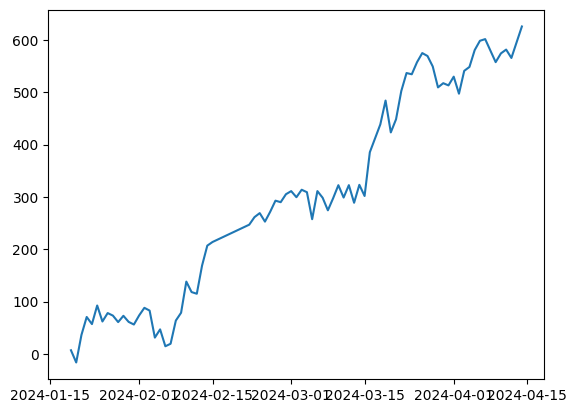

In [35]:
def apply_win_odds(row, wager=10.0):
  if row["PREDICTION"] == 1 and row["SPREAD_COVERED_BY_FAVORITE"] == 1: # Correct favorite cover prediction
    odds = row["FAVORITE_TEAM_ODDS"]
    if odds is None:
      return 0
    if odds < 0:
      return wager * (100 / abs(odds))
    else:
      return wager * (odds / 100)
  elif row["PREDICTION"] == 0 and row["SPREAD_COVERED_BY_FAVORITE"] == 0: # Correct underdog cover prediction
    odds = row["UNDERDOG_TEAM_ODDS"]
    if odds is None:
      return 0
    if odds < 0:
      return wager * (100 / abs(odds))
    else:
      return wager * (odds / 100)
  else: # Incorrect predictions
    return -wager

test["PROFIT"] = test.apply(apply_win_odds, axis=1)
plt.plot(test["GAME_DATETIME_OBJ"].unique(), test.groupby("GAME_DATETIME_OBJ")["PROFIT"].sum().cumsum())

******* CALCULATING SEASON **********
2020
Train accuracy: 0.8573770491803279
Test accuracy: 0.5393442622950819


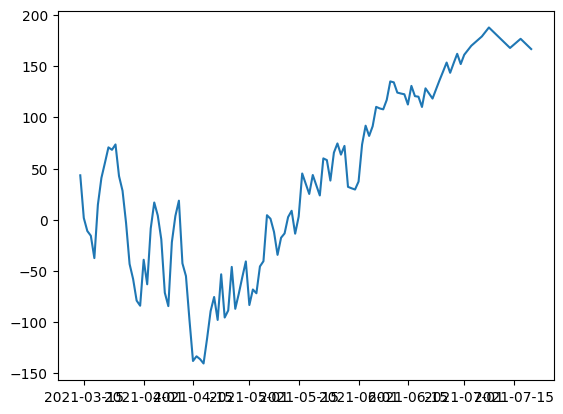

Profit: 166.663588503276
Total Wagered: 6100
Profitability: 0.02732189975463541
******* CALCULATING SEASON **********
2021
Train accuracy: 0.8776978417266187
Test accuracy: 0.5345821325648416


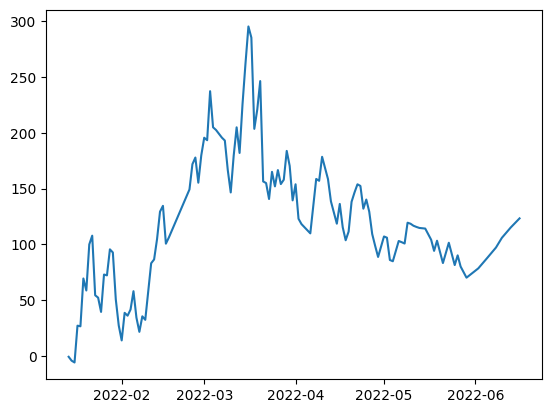

Profit: 123.23234780560719
Total Wagered: 6940
Profitability: 0.017756822450375676
******* CALCULATING SEASON **********
2022
Train accuracy: 0.8641618497109826
Test accuracy: 0.5621387283236994


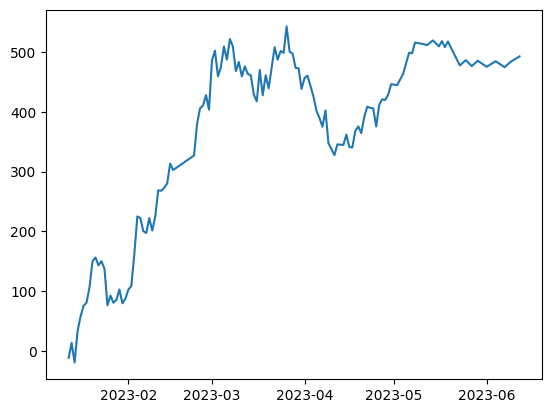

Profit: 492.4946640078679
Total Wagered: 6920
Profitability: 0.07116974913408496
******* CALCULATING SEASON **********
2023
Train accuracy: 0.9055232558139535
Test accuracy: 0.5537790697674418


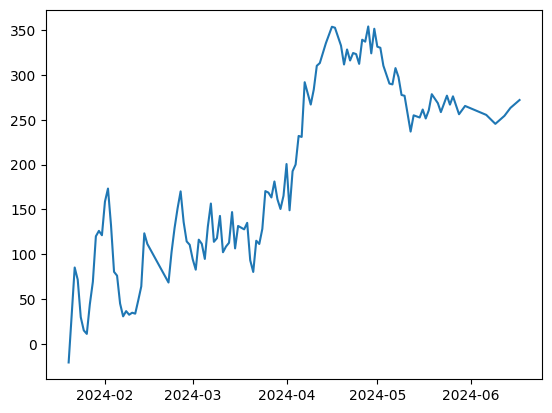

Profit: 272.1999376801012
Total Wagered: 6880
Profitability: 0.039563944430247265


In [229]:
def calculate_season_profitability(s):
  season = prepared_games_with_spreads.loc[(prepared_games_with_spreads['SEASON'] == s)].sort_values(by="GAME_DATETIME")
  splits = np.array_split(season, 4)
  train = pd.concat(splits[0:2])
  X_train, y_train = train[feat_cols], train[target]

  test = pd.concat(splits[2:4])
  X_test, y_test = test[feat_cols], test[target]
  clf = RandomForestClassifier(random_state=42, n_jobs=2, n_estimators=1000, max_depth=7, bootstrap=True)
  clf.fit(X_train, y_train)
  print('Train accuracy:',clf.score(X_train, y_train))
  print('Test accuracy:', clf.score(X_test, y_test))

  test["PREDICTION"] = clf.predict(X_test)
  test["PREDICTION"] = clf.predict(X_test)
  test["PROFIT"] = test.apply(apply_win_odds, axis=1)
  profit = test["PROFIT"].sum()

  plt.plot(test["GAME_DATETIME_OBJ"].unique(), test.groupby("GAME_DATETIME_OBJ")["PROFIT"].sum().cumsum())
  plt.show()
  return (profit, len(test), profit / (len(test) * 10))

for i in range(2020, 2024):
  print("******* CALCULATING SEASON **********")
  print(i)
  profit, total_wagers, profitability = calculate_season_profitability(i)
  print(f"Profit: {profit}")
  print(f"Total Wagered: {total_wagers * 10 }")
  print(f"Profitability: {profitability}")

## Spread model
Likely needs different feature data to predict more accurately - payouts are higher, but likelihood of correct selection is lower. Maybe spreads are more likely to be covered in playoffs (especially early rounds)? This may be something where a confidence score is better than a 0/1 result?  We only bet on outcomes that we feel higher than 75% confident in?

In [36]:
test[["NO_COVER_PROB", "COVER_PROB"]] = clf.predict_proba(X_test)
test.tail()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,PTS_HOME,FG_PCT_HOME,FT_PCT_HOME,FG3_PCT_HOME,...,FAVORITE_TEAM_ODDS,UNDERDOG_TEAM_ODDS,FAVORITE_SPREAD,SPREAD_COVERED_BY_FAVORITE,HOME_LAST_10_COVER_PCT,AWAY_LAST_10_COVER_PCT,PREDICTION,PROFIT,NO_COVER_PROB,COVER_PROB
65784,2024-04-14,22301189,Final,1610612748,1610612761,2023,118.0,0.529,0.895,0.25,...,-110.0,-110.0,-16.5,0,0.6,0.4,1,-10.000000,0.270009,0.729991
65776,2024-04-14,22301188,Final,1610612754,1610612737,2023,157.0,0.65,0.8,0.528,...,-110.0,-110.0,-14.0,1,0.6,0.3,1,9.090909,0.279204,0.720796
65768,2024-04-14,22301187,Final,1610612739,1610612766,2023,110.0,0.473,0.667,0.485,...,-110.0,-110.0,-14.5,0,0.4,0.7,0,9.090909,0.533398,0.466602
65816,2024-04-14,22301194,Final,1610612750,1610612756,2023,106.0,0.514,0.806,0.346,...,-114.0,-106.0,-2.0,0,0.2,0.6,0,9.433962,0.655395,0.344605
65880,2024-04-14,22301196,Final,1610612760,1610612742,2023,135.0,0.557,0.813,0.412,...,-112.0,-108.0,-19.5,1,0.5,0.6,0,-10.000000,0.511406,0.488594


<Axes: >

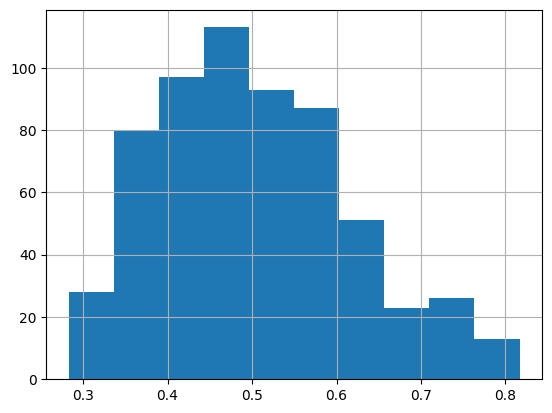

In [37]:
test["COVER_PROB"].hist()

In [38]:
stronger_test = test[(test["COVER_PROB"] > 0.65) | (test["COVER_PROB"] < 0.35)]
stronger_test_y = stronger_test[target]

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay

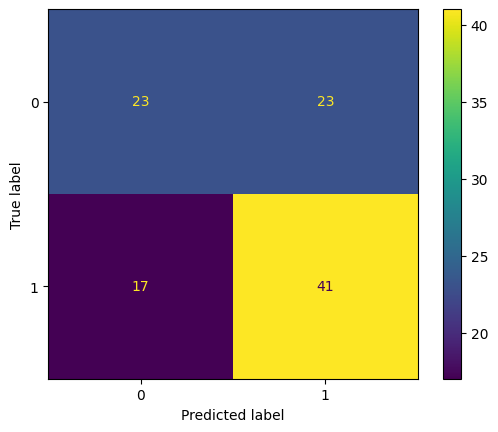

In [41]:
stronger_predictions = clf.predict(stronger_test[feat_cols])
ConfusionMatrixDisplay.from_estimator(clf, stronger_test[feat_cols], stronger_test_y)

In [42]:
clf.score(stronger_test[feat_cols], stronger_test_y)

0.6153846153846154

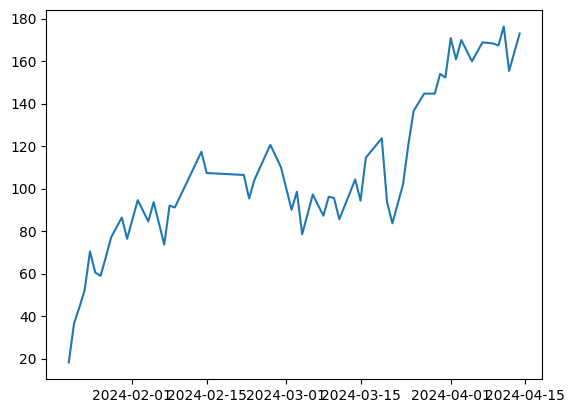

Profit: 173.01152016022084
Total Wagered: 1040
Profitability: 0.16635723092328927


In [43]:
stronger_test_profit = stronger_test["PROFIT"].sum()

plt.plot(stronger_test["GAME_DATETIME_OBJ"].unique(), stronger_test.groupby("GAME_DATETIME_OBJ")["PROFIT"].sum().cumsum())
plt.show()
print(f"Profit: {stronger_test_profit}")
print(f"Total Wagered: {len(stronger_test) * 10 }")
print(f"Profitability: {stronger_test_profit / (len(stronger_test) * 10)}")